# Initial Data Exploration -- 2
Wir haben die Daten schon aufbereitet und jetzt analysieren und filtern wir den Datensatz.
Ziel ist es falsche Werte aus dem Datensatz herauszufiltern. Dafür werfen wir einen Blick auf die unterschiedlichen Werte, die als Features dienen könnten

In [1]:
import pandas as pd

import numpy as np

import matplotlib
matplotlib.use('nbagg'),
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# next we look at our features to find outliers and values we want to sort out
# First we look at the speed
df_with_durations = pd.read_csv('../data/interim/yellow_tripdata_2019-01_durations.csv')
df_with_durations.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times (min),pickup_times (unix),Speed (mph)
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,NaN,6.666667,1.546300e+09,13.500
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,NaN,19.200000,1.546301e+09,8.125
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,...,0.5,0.00,0.0,0.3,5.80,NaN,NaN,4.166667,1.545397e+09,0.000
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,...,0.5,0.00,0.0,0.3,7.55,NaN,NaN,3.333333,1.543417e+09,0.000
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,...,0.5,0.00,0.0,0.3,55.55,NaN,NaN,1.600000,1.543417e+09,0.000


# Speed
Wir beginnen der Geschwindigkeit und dafür plotten wir zunächst einen Boxplot über alle Speed-Values im Datensatz von 2019
Wir in der folgenden Grafik sehen können ist der eigentliche Boxplot gar nicht zu erkennen aufgrund der vielen Ausreißer nach oben hin:

<IPython.core.display.Javascript object>


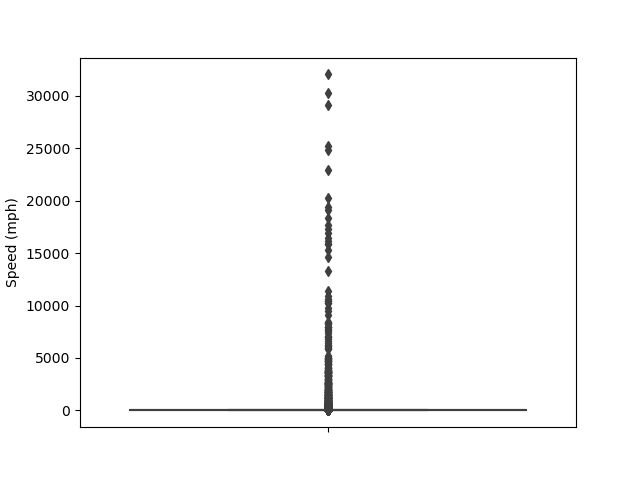

In [3]:
sns.boxplot(y="Speed (mph)", data =df_with_durations)
plt.show()

Um Ausreißer aufgrund von Messfehlern oder falschen Aufzeichnungen zu finden, betrachten wir die oberen Perzentile.
Berechnung der Geschwindigkeitswerte bei jedem Perzentil 90,91,92,93,94,95,96,97,98,99,100:

In [4]:
for i in range(90,100):
    var =df_with_durations["Speed (mph)"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 22.104129263913823
91 percentile value is 22.99383477188656
92 percentile value is 23.990860624523997
93 percentile value is 25.071428571428573
94 percentile value is 26.296296296296298
95 percentile value is 27.776096822995456
96 percentile value is 29.481346678798907
97 percentile value is 31.599671862182117
98 percentile value is 34.40273037542662
99 percentile value is 38.71345029239766
100 percentile value is  nan


Wir sehen schon die Abstände zwischen den Werten werden immer größer dennoch ist keine klare Grenze zu erkennen.
Daher suchen wir nochmal genauer weiter zwischen 99 und 100
Berechnung der Geschwindigkeitswerte bei jedem Perzentil 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100:

In [5]:
for i in np.arange(0.0, 1.0, 0.1):
    var =df_with_durations["Speed (mph)"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 38.71345029239766
99.1 percentile value is 39.31797235023042
99.2 percentile value is 39.92497069167644
99.3 percentile value is 40.68796068796068
99.4 percentile value is 41.53846153846154
99.5 percentile value is 42.626025791324736
99.6 percentile value is 43.87088915956151
99.7 percentile value is 45.91345397324941
99.8 percentile value is 50.85995085995086
99.9 percentile value is 2759.9999999999995
100 percentile value is  nan


Die Lücken werden von 99 auf 100 immer größer.
Bei 99,8 bis 99,9 ist eine große Lücke vorhanden.
das 99,8 percentile ist bei ungefähr 50 mph (ca. 80 km/h) und danach werden die Abstände sehr groß.
Wir haben uns daher dazu entschieden alle Datensätze mit Geschwindigkeiten über 50 zu löschen
Gleichzeitig sollte die Geschwindigkeit über 0 sein.

In [6]:
df_with_durations=df_with_durations[(df_with_durations['Speed (mph)']>0) & (df_with_durations['Speed (mph)']<50)]

Wir können auch die durchschnittliche Geschwindigkeit von Taxifahrern ausrechnen lassen:
Ergebnis: 12,84 mph (ca. 21 km/h)

In [7]:
sum(df_with_durations['Speed (mph)']) / float(len(df_with_durations['Speed (mph)']))

12.847241869171963

Der Boxplot nach dem Entfernen der Outlier sieht schon besser aus:

<IPython.core.display.Javascript object>


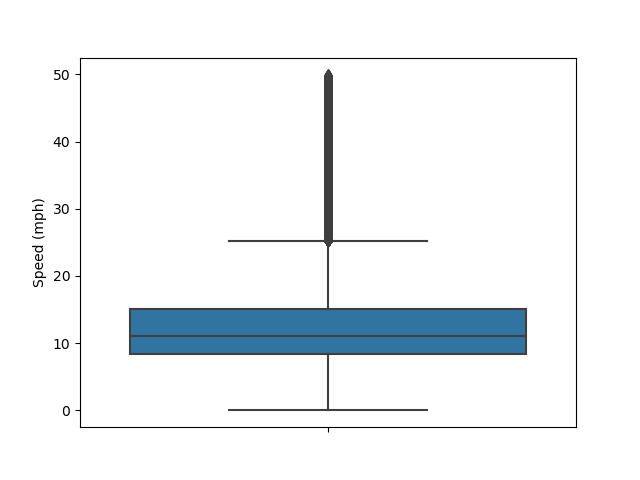

In [8]:
# our boxplot now is looking way more smooth:
sns.boxplot(y="Speed (mph)", data =df_with_durations)
plt.show()

# Trip Distance
Wir machen weiter mit der Taxi-Entfernung und dafür plotten wir zunächst einen Boxplot über alle Trip_Distance-Values (in mph) im Datensatz von 2019.
Das Vorgehen dabei ist sehr ähnlich zum Speed also wird nicht auf jede Zelle eingegangen.
Hier ergibt die Analyse, dass ab dem 99.9th Percentile die Daten entfernt werden.
Wir in der folgenden Grafik sehen können ist der eigentliche Boxplot gar nicht zu erkennen aufgrund der vielen Ausreißer nach oben hin:

<IPython.core.display.Javascript object>


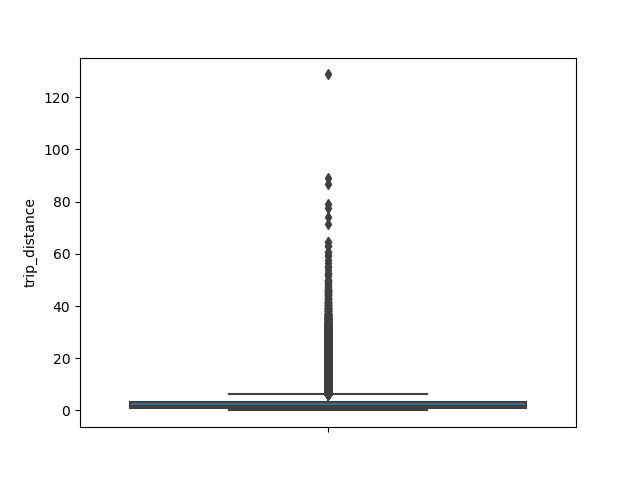

In [9]:
sns.boxplot(y="trip_distance", data =df_with_durations)
plt.show()

In [10]:
for i in range(90,100):
    var =df_with_durations["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 7.6
91 percentile value is 8.34
92 percentile value is 9.09
93 percentile value is 9.89
94 percentile value is 10.84
95 percentile value is 12.1
96 percentile value is 14.53
97 percentile value is 16.9
98 percentile value is 18.08
99 percentile value is 19.56
100 percentile value is  128.73


In [11]:
for i in np.arange(0.0, 1.0, 0.1):
    var =df_with_durations["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 19.56
99.1 percentile value is 19.8
99.2 percentile value is 20.08
99.3 percentile value is 20.38
99.4 percentile value is 20.69
99.5 percentile value is 21.0
99.6 percentile value is 21.45
99.7 percentile value is 22.09
99.8 percentile value is 23.42
99.9 percentile value is 26.83
100 percentile value is  128.73


<IPython.core.display.Javascript object>


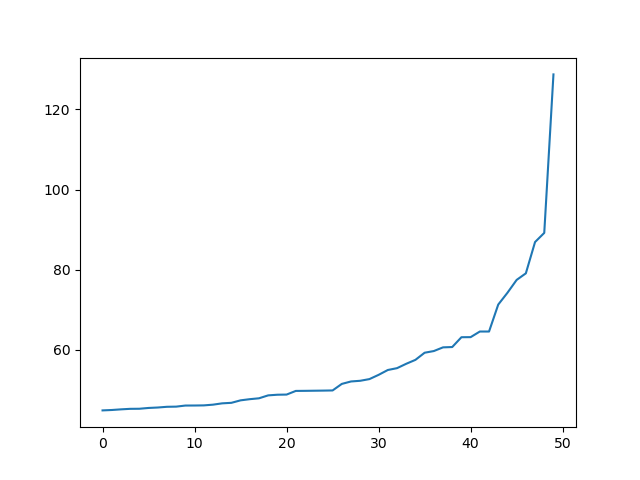

In [12]:
plt.plot(var[-50:])
plt.show()

In [13]:
df_with_durations=df_with_durations[(df_with_durations["trip_distance"]>0) & (df_with_durations["trip_distance"]<26)]

<IPython.core.display.Javascript object>


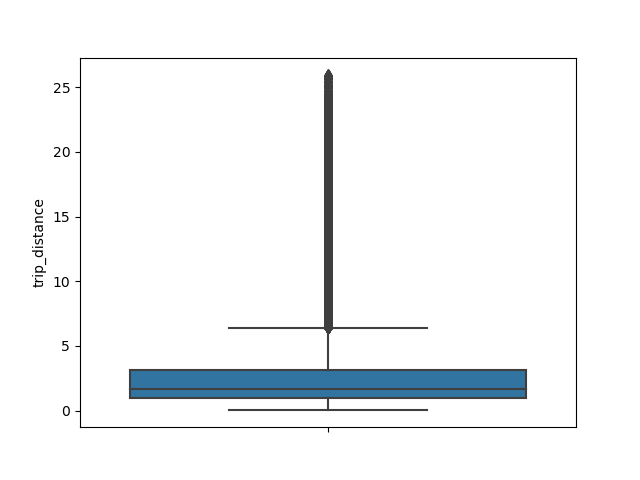

In [14]:
sns.boxplot(y="trip_distance", data = df_with_durations)
plt.show()

# Trip Times
Wir machen weiter mit den Trip Times und dafür plotten wir zunächst einen Boxplot über alle Trip Times (in min) im Datensatz von 2019.
Das Vorgehen dabei ist sehr ähnlich zum Speed also wird nicht auf jede Zelle eingegangen.
Zunächst haben wir auf der Seite der NYC Taxi Data gesehen, dass eine Taxifahrt nicht länger als 720 Minuten dauern darf, deswegen haben wir zunächst danach gefiltert,
bevor wir den Boxplot gemacht haben.
Wir in der folgenden Grafik sehen können ist der eigentliche Boxplot gar nicht zu erkennen aufgrund der vielen Ausreißer nach oben hin:

In [15]:
df_with_durations=df_with_durations[(df_with_durations['trip_times (min)']>=1) & (df_with_durations['trip_times (min)']<=720)]

<IPython.core.display.Javascript object>


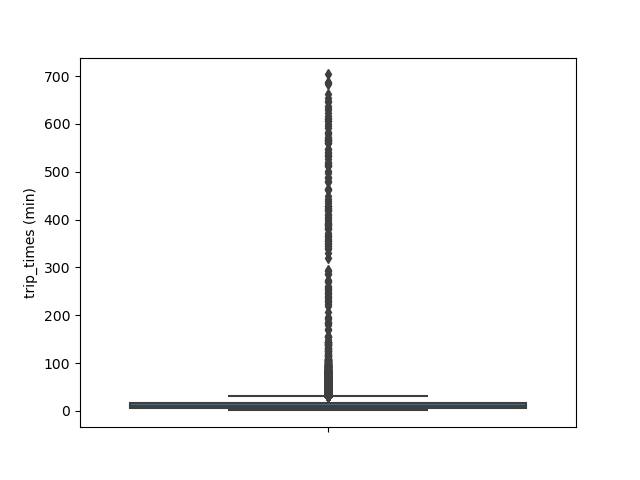

In [16]:
sns.boxplot(y="trip_times (min)", data =df_with_durations)
plt.show()

In [17]:
for i in np.arange(0.0, 1.0, 0.1):
    var =df_with_durations["trip_times (min)"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 47.61666666666667
99.1 percentile value is 48.6
99.2 percentile value is 49.68333333333333
99.3 percentile value is 50.96666666666667
99.4 percentile value is 52.46666666666667
99.5 percentile value is 54.15
99.6 percentile value is 56.16666666666666
99.7 percentile value is 58.85
99.8 percentile value is 62.65
99.9 percentile value is 69.21666666666667
100 percentile value is  703.3833333333333


Hier ergibt die Analyse, dass selbst ab dem 99.9th Percentile noch keine großen Lücken erkannt werden können.
Daher werden die Werte einmal grafisch geplottet

<IPython.core.display.Javascript object>


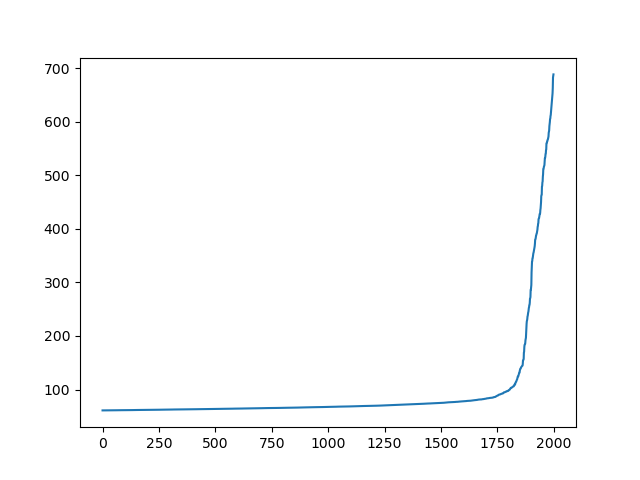

In [18]:
plt.plot(var[-2000:-1])
plt.show()

In [19]:
df_with_durations.sort_values(by=['trip_times (min)'], ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times (min),pickup_times (unix),Speed (mph)
90870,2,2019-01-01 12:16:37,2019-01-02 00:00:00,3.0,3.40,1.0,N,170,236,2,...,0.5,0.00,0.00,0.3,13.30,NaN,NaN,703.383333,1.546341e+09,0.290027
88566,2,2019-01-01 12:31:32,2019-01-02 00:00:00,2.0,18.13,2.0,N,132,234,1,...,0.5,8.78,5.76,0.3,67.34,NaN,NaN,688.466667,1.546342e+09,1.580033
689122,2,2019-01-04 12:34:26,2019-01-05 00:00:00,1.0,3.92,1.0,N,255,107,1,...,0.5,2.67,0.00,0.3,20.47,NaN,NaN,685.566667,1.546602e+09,0.343074
438560,2,2019-01-03 00:00:00,2019-01-03 11:22:39,5.0,11.76,1.0,N,138,264,2,...,0.5,0.00,5.76,0.3,40.56,NaN,NaN,682.650000,1.546470e+09,1.033619
696131,2,2019-01-04 12:56:53,2019-01-05 00:00:00,3.0,2.00,1.0,N,229,48,1,...,0.5,2.14,0.00,0.3,16.44,NaN,NaN,663.116667,1.546603e+09,0.180964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521050,2,2019-01-03 16:23:00,2019-01-03 16:24:00,1.0,0.21,1.0,N,237,236,1,...,0.5,3.00,0.00,0.3,7.80,NaN,NaN,1.000000,1.546529e+09,12.600000
525166,2,2019-01-03 17:17:29,2019-01-03 17:18:29,1.0,0.31,1.0,N,79,107,1,...,0.5,0.96,0.00,0.3,5.76,NaN,NaN,1.000000,1.546532e+09,18.600000
260874,1,2019-01-02 12:22:27,2019-01-02 12:23:27,1.0,0.30,1.0,N,141,140,2,...,0.5,0.00,0.00,0.3,3.80,NaN,NaN,1.000000,1.546428e+09,18.000000
28511,2,2019-01-01 01:15:10,2019-01-01 01:16:10,1.0,0.16,1.0,N,74,74,2,...,0.5,0.00,0.00,0.3,4.30,NaN,NaN,1.000000,1.546302e+09,9.600000


Wie wir sehen können, gibt es immer noch Fahrtzeiten, die sehr hoch sind, aber die Fahrtdistanz und der Fahrpreis stimmen nicht wirklich mit dieser Fahrtzeit überein.
Dennoch werden hier keine weiteren Outlier aus dem Datensatz gelöscht aber hier wäre eine weitere Einschränkung der 720 auf ca 100 sinnvoll, um mögliche False Outlier zu entfernen.
Es könnte sich jedoch auch um echte Fahrten handeln, denn möglich wären solche langen Fahrten, beispielsweise bei mehreren Zwischenzielen und durch Warten auf einen Kunden.
Daher werden die Daten so gelassen.
Nach der Analyse hätten alle Werte über 100 entfernt werden müssen

# Total Amount
Wir machen weiter mit den Total Amounts und dafür plotten wir zunächst einen Boxplot über alle Total Amount im Datensatz von 2019.
Das Vorgehen dabei ist sehr ähnlich zum Speed also wird nicht auf jede Zelle eingegangen.
Wir in der folgenden Grafik sehen können ist der eigentliche Boxplot gar nicht zu erkennen aufgrund der vielen Ausreißer nach oben hin.
Zudem gibt es hier auch viele Ausreißer nach unten.

<IPython.core.display.Javascript object>


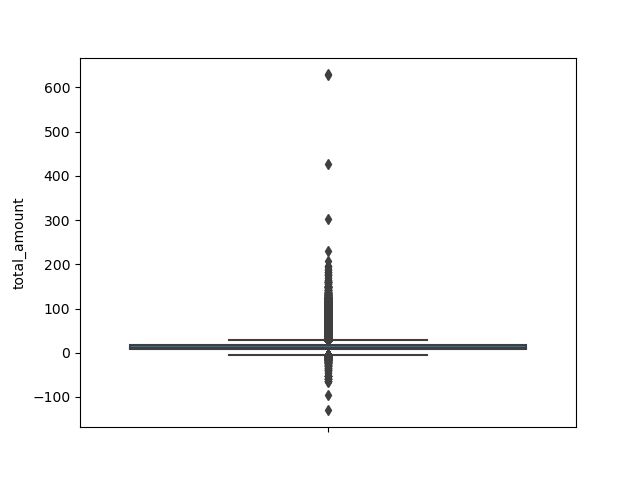

In [20]:
# next feature is total_amout

sns.boxplot(y="total_amount", data =df_with_durations)
plt.show()

In [21]:
for i in np.arange(0.0, 1.0, 0.1):
    var = df_with_durations["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 70.27
99.1 percentile value is 70.27
99.2 percentile value is 72.06
99.3 percentile value is 73.2
99.4 percentile value is 74.06
99.5 percentile value is 75.66
99.6 percentile value is 75.67
99.7 percentile value is 78.82
99.8 percentile value is 84.58
99.9 percentile value is 96.8
100 percentile value is  629.27


Ein großer Unterschied zwischen 99,8 und 99,9, aber 94 Dollar scheinen ein möglicher Preis zu sein, also müssen wir uns das genauer ansehen.
Wir stellen also die letzten 50 Werte dar

<IPython.core.display.Javascript object>


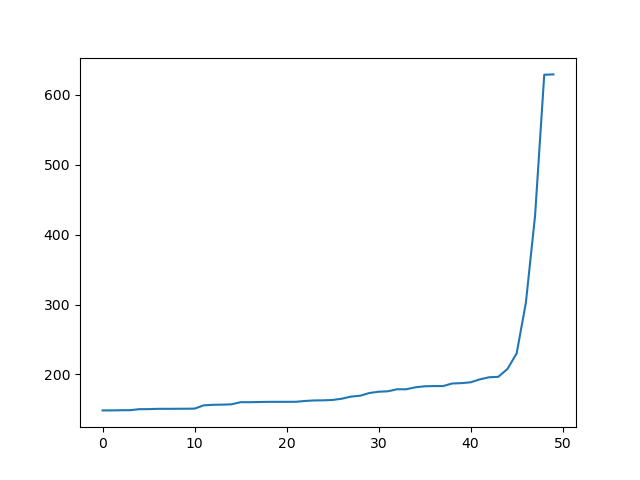

In [22]:
plt.plot(var[-50:])
plt.show()

Wie wir sehen können, gibt es eine große Spitze um 200 Hundert.
Daher haben wir beschlossen, den maximalen fare_amount auf 200 zu setzen, da die darüber liegenden Werte als false outlier erscheinen.

In [23]:
df_with_durations=df_with_durations[(df_with_durations['total_amount']<=200)]

# Diese Diagramme haben uns geholfen, die Daten zu untersuchen, und mit diesen Informationen können wir ein Skript erstellen, das die Daten vorverarbeitet
# script: clean_data.py
